In [196]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uppar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
# Specify the folder path where your datasets are located
folder_path = 'recruitment_data'  # Update this to the folder where the datasets are located

# List all Excel files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]

In [200]:
# Loop through each file and print only the column names
for file in files:
    df = pd.read_excel(folder_path + '/' + file)
    print(f"Columns in {file}:")
    print([col for col in df.columns])  # Ensure the output only contains column names
    print()  # Add a blank line for better readability

Columns in dataset5.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset6.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset7.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset8.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset9.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']



In [202]:
# Code for Merging all the datasets and creating the full dataset for traing and testing
dataframes = []

for file in files:
    file_path = os.path.join(folder_path, file)
    combined_df = pd.read_excel(file_path)
    dataframes.append(combined_df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

In [204]:
combined_df.shape

(1000, 8)

In [206]:
combined_df.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,durgba001,Elizabeth Smith,UI Engineer,Interview Transcript\n\nInterviewer: Rachel Le...,Elizabeth Smith\nUI Engineer\n\nContact Inform...,reject,Showed lack of preparedness for typical interv...,Skilled UI Engineer with expertise in Frontend...
1,durgba002,Amanda Campbell,Data Engineer,Interview Transcript: Data Engineer Position\n...,Amanda Campbell\nContact Information:\n\n* Ema...,reject,Had difficulty applying theoretical knowledge ...,Skilled Data Engineer with expertise in Python...
2,durgba003,Stephen Velez,Product Manager,Product Manager Interview\n\nInterviewer: Rach...,Stephen Velez\nContact Information:\n\n* Email...,reject,Displayed rigidity in adapting to alternative ...,Skilled Product Manager with expertise in Road...
3,durgba004,Guy Shaw,Data Engineer,Interview Transcript\n\nInterviewer: Rachel Pa...,Guy Shaw\nData Engineer\n\nContact Information...,select,Displayed excellent collaboration and teamwork...,Skilled Data Engineer with expertise in Python...
4,durgba005,Jeffrey Bailey,Software Engineer,Interview Transcript\n\nInterviewer: Rachel Ch...,Here is a resume for Jeffrey Bailey:\n\nJeffre...,reject,Had difficulty applying theoretical knowledge ...,Skilled Software Engineer with expertise in We...


In [208]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1000 non-null   object
 1   Name                 1000 non-null   object
 2   Role                 1000 non-null   object
 3   Transcript           1000 non-null   object
 4   Resume               1000 non-null   object
 5   decision             1000 non-null   object
 6   Reason for decision  1000 non-null   object
 7   Job Description      1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [210]:
# # Drop the last two columns: 'Unnamed: 0' and 'num_words_in_transcript'
# columns_to_drop = ['Unnamed: 0', 'num_words_in_transcript']
# combined_df = combined_df.drop(columns=columns_to_drop, errors='ignore')

In [212]:
# Function to clean text columns
def clean_text_column(column):
    """
    Cleans a text column by:
    1. Removing all non-alphabetic characters.
    2. Removing extra spaces.
    3. Converting text to lowercase.
    """
    if column.dtype == 'object':  # Only apply to text columns
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

# Clean specific text columns
columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Display cleaned data for verification
print("Cleaned Data Sample:")
combined_df.head()


Cleaned Data Sample:


,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,durgba001,Elizabeth Smith,UI Engineer,interview transcript\n\ninterviewer rachel lee...,elizabeth smith\nui engineer\n\ncontact inform...,reject,showed lack of preparedness for typical interv...,skilled ui engineer with expertise in frontend...
1,durgba002,Amanda Campbell,Data Engineer,interview transcript data engineer position\n\...,amanda campbell\ncontact information\n\n email...,reject,had difficulty applying theoretical knowledge ...,skilled data engineer with expertise in python...
2,durgba003,Stephen Velez,Product Manager,product manager interview\n\ninterviewer rache...,stephen velez\ncontact information\n\n email s...,reject,displayed rigidity in adapting to alternative ...,skilled product manager with expertise in road...
3,durgba004,Guy Shaw,Data Engineer,interview transcript\n\ninterviewer rachel pat...,guy shaw\ndata engineer\n\ncontact information...,select,displayed excellent collaboration and teamwork...,skilled data engineer with expertise in python...
4,durgba005,Jeffrey Bailey,Software Engineer,interview transcript\n\ninterviewer rachel che...,here is a resume for jeffrey bailey\n\njeffrey...,reject,had difficulty applying theoretical knowledge ...,skilled software engineer with expertise in we...


In [214]:
combined_df['decision'].unique()

array(['reject', 'select', 'rejected', 'selected', 'Select', 'Reject'],
      dtype=object)

In [216]:
def process_decision(text):
    if text in ['select','selected']:
        return 'select'
    else :
        return 'reject'

In [218]:
combined_df['Role'].unique()

array(['UI Engineer', 'Data Engineer', 'Product Manager',
       'Software Engineer', 'Data Scientist', 'Data Analyst',
       'UI Designer', 'Digital Marketing Specialist',
       'Cybersecurity Specialist', 'HR Specialist', 'Network Engineer',
       'Graphic Designer', 'Game Developer', 'Mobile App Developer',
       'Cloud Architect', 'Business Analyst', 'Database Administrator',
       'DevOps Engineer', 'Machine Learning Engineer', 'Content Writer',
       'System Administrator', 'UI/UX Designer', 'AI Engineer',
       'Project Manager', 'Software Developer'], dtype=object)

In [220]:
unique_count = combined_df.groupby('Role')['ID'].count()
unique_count

Role
AI Engineer                      13
Business Analyst                 11
Cloud Architect                   8
Content Writer                    5
Cybersecurity Specialist          9
Data Analyst                     78
Data Engineer                    99
Data Scientist                  203
Database Administrator            9
DevOps Engineer                  16
Digital Marketing Specialist     14
Game Developer                   10
Graphic Designer                 15
HR Specialist                    12
Machine Learning Engineer        13
Mobile App Developer              7
Network Engineer                 16
Product Manager                  99
Project Manager                  56
Software Developer               66
Software Engineer               114
System Administrator              5
UI Designer                      71
UI Engineer                      44
UI/UX Designer                    7
Name: ID, dtype: int64

In [222]:
# Generate summary insights
insights = {}

# Total Candidates
insights['Total Candidates'] = len(combined_df)

# Selected and Rejected Candidates
if 'decision' in combined_df.columns:
    decision_counts = combined_df['decision'].str.strip().value_counts()
    insights['Selected Candidates'] = decision_counts.get('select', 0)
    insights['Rejected Candidates'] = decision_counts.get('reject', 0)
else:
    insights['Selected Candidates'] = "Column 'Decision' not found"
    insights['Rejected Candidates'] = "Column 'Decision' not found"

# Most Common Reason for Decision
if 'Reason for decision' in combined_df.columns:
    insights['Most Common Reason for Decision'] = combined_df['Reason for decision'].mode()[0]
else:
    insights['Most Common Reason for Decision'] = "Column 'Reason for decision' not found"

# Print insights
print("Insights:")
for key, value in insights.items():
    print(f"{key}: {value}")


Insights:
Total Candidates: 1000
Selected Candidates: 98
Rejected Candidates: 102
Most Common Reason for Decision: highly adaptable to different work environments


In [224]:
# Check for null values
print("Null values in combined dataset:")
print(combined_df.isnull().sum())


Null values in combined dataset:
ID                     0
Name                   0
Role                   0
Transcript             0
Resume                 0
decision               0
Reason for decision    0
Job Description        0
dtype: int64


In [226]:
# Basic statistics for numeric columns
print("Basic statistics for numeric columns:")
print(combined_df.describe())


Basic statistics for numeric columns:
               ID    Name            Role  \
count        1000    1000            1000   
unique       1000     489              25   
top     durgba001  Ananya  Data Scientist   
freq            1      21             203   

                                               Transcript  \
count                                                1000   
unique                                               1000   
top     interview transcript\n\ninterviewer rachel lee...   
freq                                                    1   

                                                   Resume  decision  \
count                                                1000      1000   
unique                                               1000         6   
top     elizabeth smith\nui engineer\n\ncontact inform...  selected   
freq                                                    1       307   

                                    Reason for decision  \
count          

In [242]:
# Add length columns for Transcript, Resume, and Job Description
combined_df['Transcript_length'] = combined_df['Transcript'].apply(lambda x: len(str(x)))
combined_df['Resume_length'] = combined_df['Resume'].apply(lambda x: len(str(x)))
combined_df['Job_Description_length'] = combined_df['Job Description'].apply(lambda x: len(str(x)))

In [244]:
print(combined_df.columns.tolist())


['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'Transcript_length', 'Resume_length', 'Job_Description_length']


In [248]:
combined_df.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,Transcript_length,Resume_length,Job_Description_length
0,durgba,elizabeth smith,ui engineer,interview transcript\n\ninterviewer rachel lee...,elizabeth smith\nui engineer\n\ncontact inform...,reject,showed lack of preparedness for typical interv...,skilled ui engineer with expertise in frontend...,3406,2220,138
1,durgba,amanda campbell,data engineer,interview transcript data engineer position\n\...,amanda campbell\ncontact information\n\n email...,reject,had difficulty applying theoretical knowledge ...,skilled data engineer with expertise in python...,2792,1842,111
2,durgba,stephen velez,product manager,product manager interview\n\ninterviewer rache...,stephen velez\ncontact information\n\n email s...,reject,displayed rigidity in adapting to alternative ...,skilled product manager with expertise in road...,2979,2014,142
3,durgba,guy shaw,data engineer,interview transcript\n\ninterviewer rachel pat...,guy shaw\ndata engineer\n\ncontact information...,select,displayed excellent collaboration and teamwork...,skilled data engineer with expertise in python...,3676,1938,109
4,durgba,jeffrey bailey,software engineer,interview transcript\n\ninterviewer rachel che...,here is a resume for jeffrey bailey\n\njeffrey...,reject,had difficulty applying theoretical knowledge ...,skilled software engineer with expertise in we...,2809,2026,118


In [250]:
combined_df.groupby(['Role','decision'])['Transcript_length'].mean()

Role                          decision
ai engineer                   rejected    3385.800000
                              selected    4045.375000
business analyst              rejected    3646.800000
                              selected    4396.000000
cloud architect               rejected    3575.500000
                              selected    4977.250000
content writer                rejected    3066.666667
                              selected    4024.500000
cybersecurity specialist      rejected    3927.333333
                              selected    4397.000000
data analyst                  rejected    3472.219512
                              selected    4695.189189
data engineer                 reject      3218.208333
                              rejected    3374.371429
                              select      3178.785714
                              selected    4811.423077
data scientist                reject      3912.940000
                              rejected    3

C:\Users\uppar\AppData\Local\Temp\ipykernel_8480\2476695546.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='coolwarm')


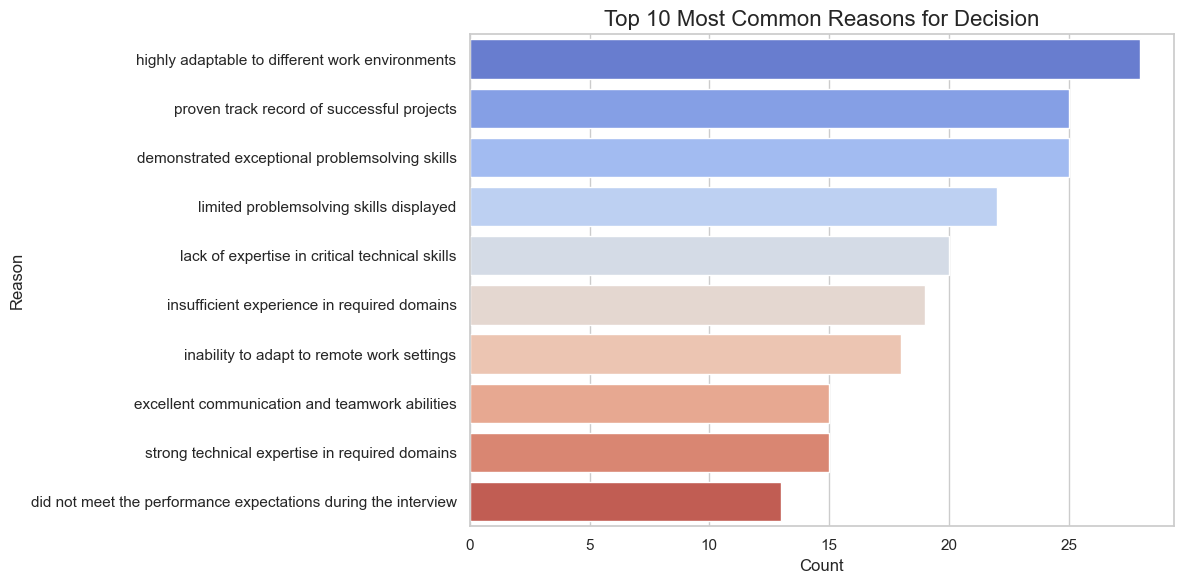

In [252]:
# Configure visualizations
sns.set(style="whitegrid")

# Plot the most common 'Reason for Decision' if the column exists
if 'Reason for decision' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Get the top 10 most common reasons
    reason_counts = combined_df['Reason for decision'].value_counts().head(10)
    
    # Create the bar plot
    sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='coolwarm')
    
    # Add plot title and axis labels
    plt.title('Top 10 Most Common Reasons for Decision', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Reason', fontsize=12)
    plt.tight_layout()
    plt.show()


In [254]:
# Check for missing values or completely empty rows
print("Number of missing values in Transcript:", combined_df['Transcript'].isnull().sum())
print("Number of missing values in Resume:", combined_df['Resume'].isnull().sum())
print("Number of missing values in Transcript:", combined_df['Reason for decision'].isnull().sum())
print("Number of missing values in Resume:", combined_df['Job Description'].isnull().sum())

Number of missing values in Transcript: 0
Number of missing values in Resume: 0
Number of missing values in Transcript: 0
Number of missing values in Resume: 0


In [256]:
# Apply cleaning to all object-type columns in the dataset
combined_df = combined_df.apply(lambda col: clean_text_column(col) if col.dtype == 'object' else col)


In [258]:
# Check for remaining unwanted characters
for col in columns_to_clean:
    if col in combined_df.columns:
        print(f"Sample cleaned data from column '{col}':")
        combined_df[col].head()


Sample cleaned data from column 'Transcript':
Sample cleaned data from column 'Resume':
Sample cleaned data from column 'Job Description':
Sample cleaned data from column 'Reason for decision':


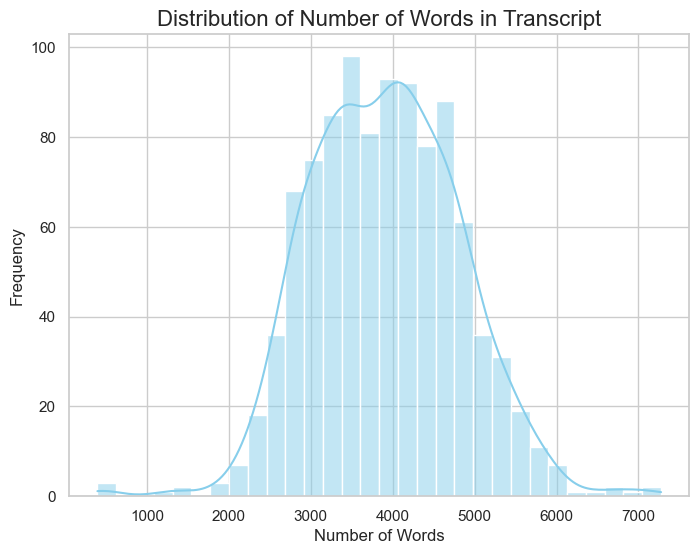

In [262]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Transcript_length'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Number of Words in Transcript", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


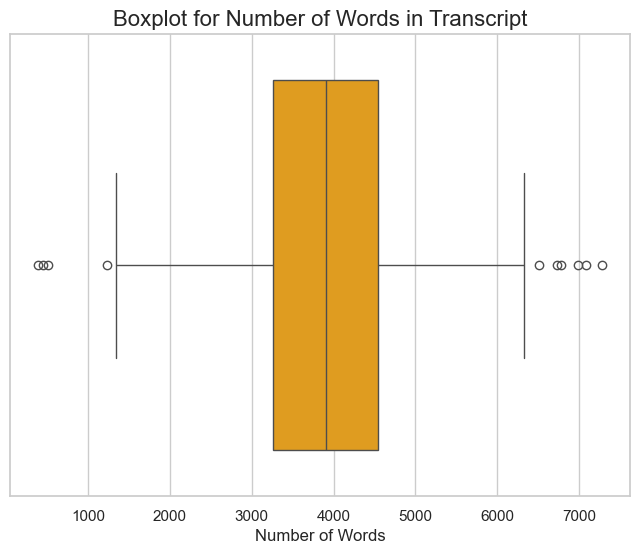

In [266]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_df['Transcript_length'], color='orange')
plt.title("Boxplot for Number of Words in Transcript", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.show()


C:\Users\uppar\AppData\Local\Temp\ipykernel_8480\425891037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='decision', palette='viridis')


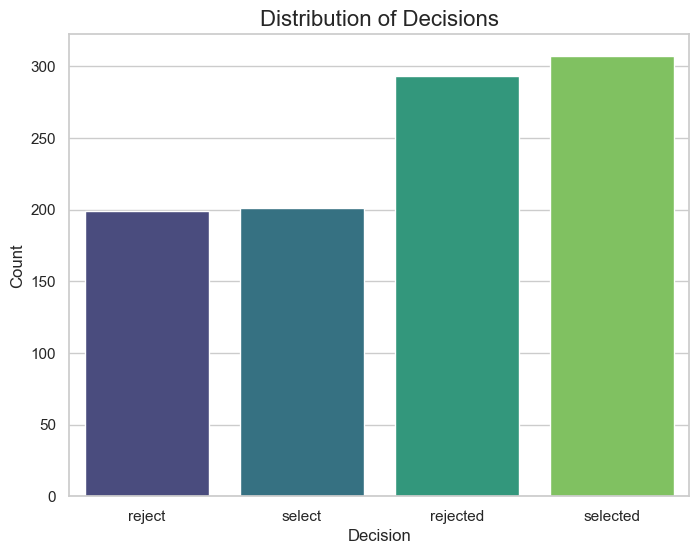

In [268]:
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x='decision', palette='viridis')
plt.title("Distribution of Decisions", fontsize=16)
plt.xlabel("Decision", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


C:\Users\uppar\AppData\Local\Temp\ipykernel_8480\1942180684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')


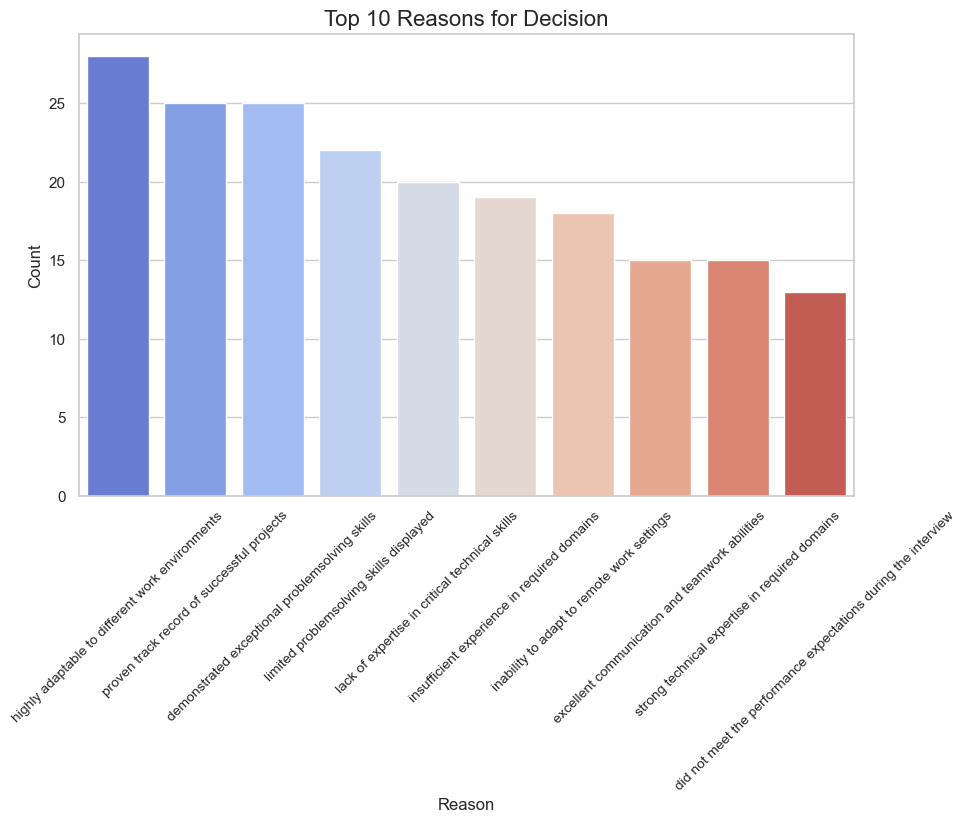

In [270]:
plt.figure(figsize=(10, 6))
reason_counts = combined_df['Reason for decision'].value_counts().head(10)
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')
plt.title("Top 10 Reasons for Decision", fontsize=16)
plt.xlabel("Reason", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


In [66]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 72.8 kB/s eta 0:28:36
   ---------------------------------------- 0.0/124.9 MB 72.8 kB/s eta 0:28:36
   ---------------------------------------- 0.0/124.9 MB 72.8 kB/s eta 0:28:36
   ---------------------------------------- 0.1/124.9

In [303]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import matplotlib.pyplot as plt


In [305]:
# Define folder path
folder_path = 'recruitment_data'

# Load all Excel files
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
dataframes = [pd.read_excel(os.path.join(folder_path, file)) for file in files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Clean text columns
def clean_text_column(column):
    if column.dtype == 'object':
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Process decision column
combined_df['decision'] = combined_df['decision'].apply(lambda x: 'select' if x in ['select', 'selected'] else 'reject')


In [307]:
# Separate features and target
X = combined_df.drop(['decision', 'ID'], axis=1, errors='ignore')
y = combined_df['decision']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode target labels


In [309]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")


Train set size: (800, 3428), Test set size: (200, 3428)


In [311]:
# Logistic Regression with hyperparameter tuning
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

# Best model and evaluation
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression - Accuracy:", acc_lr)
print("Logistic Regression - ROC AUC Score:", roc_lr)


Logistic Regression - Accuracy: 0.775
Logistic Regression - ROC AUC Score: 0.8686585745409274


In [313]:
# Decision Tree with hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

# Best model and evaluation
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
acc_dt = accuracy_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree - Accuracy:", acc_dt)
print("Decision Tree - ROC AUC Score:", roc_dt)


Decision Tree - Accuracy: 0.695
Decision Tree - ROC AUC Score: 0.7690113082269945


In [315]:
# Random Forest with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

# Best model and evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest - Accuracy:", acc_rf)
print("Random Forest - ROC AUC Score:", roc_rf)


Random Forest - Accuracy: 0.63
Random Forest - ROC AUC Score: 0.8499325656188401


In [333]:
# XGBoost with hyperparameter tuning
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)

# Best model and evaluation
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost - Accuracy:", acc_xgb)
print("XGBoost - ROC AUC Score:", roc_xgb)


C:\Users\uppar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:26:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\uppar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:26:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\uppar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:26:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\uppar\anaconda3\Lib\site-packages\

XGBoost - Accuracy: 0.725
XGBoost - ROC AUC Score: 0.8340076771449321


C:\Users\uppar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:26:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [319]:
# Summarize results
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_xgb],
    'ROC AUC': [roc_lr, roc_dt, roc_rf, roc_xgb]
}

results_df = pd.DataFrame(results)
print(results_df)

# Identify the best model
best_model_index = results_df['ROC AUC'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Model']
print("Best Model:", best_model_name)


                 Model  Accuracy   ROC AUC
0  Logistic Regression     0.775  0.868659
1        Decision Tree     0.695  0.769011
2        Random Forest     0.630  0.849933
3              XGBoost     0.725  0.834008
Best Model: Logistic Regression


Model: Logistic Regression
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       119
           1       0.73      0.64      0.68        81

    accuracy                           0.76       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.76      0.76      0.76       200



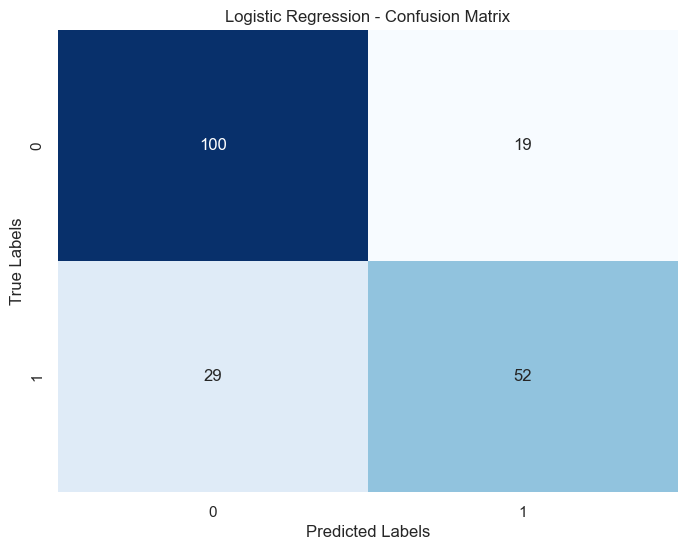

Model: Decision Tree
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       119
           1       0.73      0.60      0.66        81

    accuracy                           0.75       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



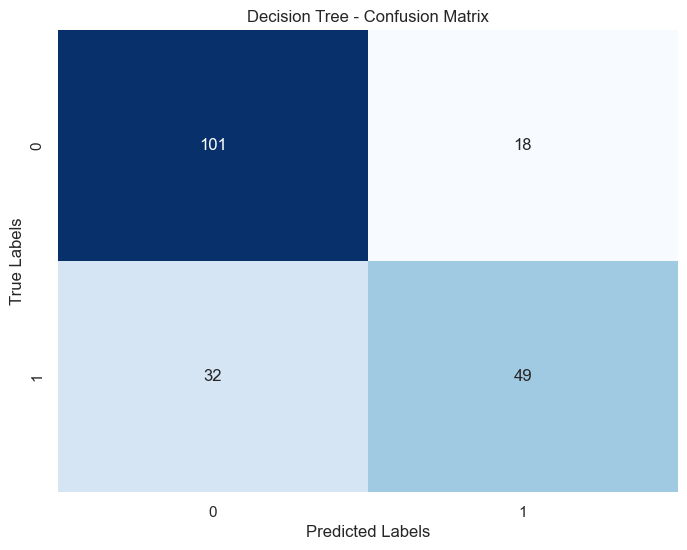

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Define a function to plot results for each model
def plot_model_results(model_name, model, X_train, X_test, y_train, y_test):
    # Predict
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Plot Feature Importance if the model supports it
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        if feature_importances is not None and len(feature_importances) > 0:
            # Plot feature importance
            plt.figure(figsize=(8, 6))
            plt.barh(range(len(feature_importances)), feature_importances)
            plt.title(f"{model_name} - Feature Importance")
            plt.xlabel("Importance")
            plt.ylabel("Features")
            plt.show()

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Train and plot for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    plot_model_results(model_name, model, X_train, X_test, y_train, y_test)
